### Image Segmentation
- Segmentation partitions an image into regions having similar visual apperance corresponding to the parts of objects
- Try to extract the most dominant K colors using K-Means
- Apply K-Means with each pixel getting reassigned to the closest of the K Colors, leading to segemntation

In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
img = cv2.cvtColor(cv2.imread('man.jpg'), cv2.COLOR_BGR2RGB)
print(img.shape)

(1200, 1200, 3)


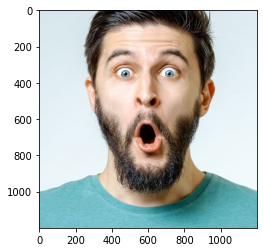

In [3]:
plt.imshow(img)
plt.show()

In [5]:
all_pixels = img.reshape((-1, 3))
print(all_pixels.shape) # Linear channel for R, G, and B

(1440000, 3)


In [6]:
from sklearn.cluster import KMeans

In [7]:
dominant_colors = 4
km = KMeans(n_clusters = dominant_colors)

In [8]:
km.fit(all_pixels)

KMeans(n_clusters=4)

In [22]:
centers = km.cluster_centers_

In [23]:
centers = np.array(centers, dtype='uint8')

In [35]:
centers

array([[104, 180, 187],
       [231, 233, 231],
       [ 56,  48,  39],
       [170, 137, 111]], dtype=uint8)

In [26]:
pred = km.labels_

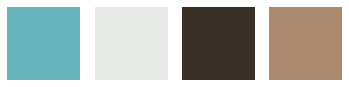

In [33]:
plt.figure(0)
colors = []
for i in range(dominant_colors) :
    plt.subplot(1, 4, i + 1)
    colors.append(centers[i])
    #Create color swatch
    a = np.zeros((100, 100, 3), dtype='uint8')
    a[:, :, :] = centers[i]
    plt.axis("off")
    plt.imshow(a)
plt.show()

In [34]:
colors

[array([104, 180, 187], dtype=uint8),
 array([231, 233, 231], dtype=uint8),
 array([56, 48, 39], dtype=uint8),
 array([170, 137, 111], dtype=uint8)]

In [40]:
newimg = np.zeros((1200 * 1200, 3), dtype='uint8')
for i in range(1200*1200) :
    newimg[i] = colors[pred[i]]

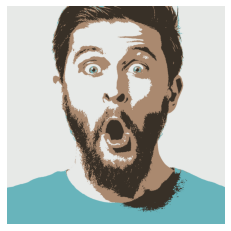

In [43]:
plt.imshow(newimg.reshape((1200, 1200, 3)))
plt.axis('off')
plt.show()

In [42]:
# Now we can extract regions by taking all those pixel values that have that color